In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

In [3]:
dataset = 'MNLI'
num_layer = 12
num_heads = 12

In [4]:
color_dict = {
            0 :'r',
            1 :'g',
            2 :'b',
            3 :'y',
            4 :'cyan',
            5 :'magenta',
            6 :'black',
            7 :'grey',
            8 :'orange',
            9 :'purple',
            10 :'navy',
            11 :'pink'
        }

In [5]:
def display_plot(image1):
    # read images
    img_A = mpimg.imread(image1)

    # display images
    fig, ax = plt.subplots(1,1 ,figsize=(10,10))
    ax.imshow(img_A);
    ax.axis('off')
    plt.show()

In [6]:
def display_side_by_side(image1, image2):
    # read images
    img_A = mpimg.imread(image1)
    img_B = mpimg.imread(image2)

    # display images
    fig, ax = plt.subplots(1,2 ,figsize=(15,15))
    ax[0].imshow(img_A);
    ax[0].axis('off')
    ax[1].imshow(img_B);
    ax[1].axis('off')

In [7]:
def plot_head_relation(exclude_diff, keep_diff):
    fig, ax = plt.subplots(1,1 ,figsize=(5,5))

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.2,
                     box.width, box.height * 0.85])
    
    for ind, (exclude, keep) in enumerate(zip(exclude_diff, keep_diff)):
        scatter = ax.scatter(exclude, keep, c=color_dict[ind], label=ind, s=30)
    
#     lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), title="Heads", ncol=int(len(exclude_diff)/2), prop={'size': 10})
#     for handle in lgd.legendHandles:
#         handle.set_sizes([100.0])

    exclude_min_val = np.min(exclude_diff)
    exclude_max_val = np.max(exclude_diff)    
    exclude_margin = (exclude_max_val - exclude_min_val) / 5
    
    exclude_min_val = exclude_min_val - exclude_margin
    exclude_max_val = exclude_max_val + exclude_margin

    ax.set_xlim((exclude_min_val, exclude_max_val))
    ax.set_xlabel("excluding one")
    
    keep_min_val = np.min(keep_diff)
    keep_max_val = np.max(keep_diff)
    keep_margin = (keep_max_val - keep_min_val) / 5
    
    keep_min_val = keep_min_val - keep_margin
    keep_max_val = keep_max_val + keep_margin

    ax.set_ylim((keep_min_val, keep_max_val))
    ax.set_ylabel("keeping one")

    ax.axvline(x=0, ls="--", c=".3")
    ax.axhline(y=0, ls="--", c=".3")
    
    plt.xticks(rotation=90)
    
    plt.show()

In [8]:
def plot_all_relation(exclude_diff, keep_diff):
    fig, ax = plt.subplots(1,1 ,figsize=(7,7))

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.2,
                     box.width, box.height * 0.85])
    
    for ind, (exclude, keep) in enumerate(zip(exclude_diff, keep_diff)):
        scatter = ax.scatter(exclude, keep, label=ind, c=color_dict[ind], s=30)
    
    lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20), title="Layers", ncol=int(len(exclude_diff)/2), prop={'size': 10})
    for handle in lgd.legendHandles:
        handle.set_sizes([100.0])

    exclude_min_val = np.min(exclude_diff)
    exclude_max_val = np.max(exclude_diff)    
    exclude_margin = (exclude_max_val - exclude_min_val) / 5
    
    exclude_min_val = exclude_min_val - exclude_margin
    exclude_max_val = exclude_max_val + exclude_margin

    ax.set_xlim((exclude_min_val, exclude_max_val))
    ax.set_xlabel("excluding one")
    
    keep_min_val = np.min(keep_diff)
    keep_max_val = np.max(keep_diff)
    keep_margin = (keep_max_val - keep_min_val) / 5
    
    keep_min_val = keep_min_val - keep_margin
    keep_max_val = keep_max_val + keep_margin

    ax.set_ylim((keep_min_val, keep_max_val))
    ax.set_ylabel("keeping one")

    ax.axvline(x=0, ls="--", c=".3")
    ax.axhline(y=0, ls="--", c=".3")
    
    plt.xticks(rotation=90)
    
    plt.show()

### following plots are generated with test set
### fine-tuned models are finetuned using train set
### seed is fixed

# Heads distribution of each layer

    captures distributions of 12 heads in the same layer
    left : before finetuning (on BERT-base)
    right : after finetuning

In [9]:
f=open(f"../ablation_results/1/{dataset}/ablation_results.txt", "r")
accuracy = f.read().splitlines()

f=open(f"../ablation_results/1/{dataset}/reverse_ablation_results.txt", "r")
reverse_accuracy = f.read().splitlines()

base_acc = round(float(accuracy[0]),5)
print(f"BASE ACC : {base_acc}")

BASE ACC : 0.8272




< LAYER 0 >


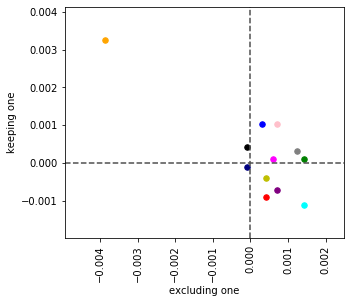

	head	ablating	keeping
	0	0.00041 	-0.00091
	1	0.00143 	0.00011
	2	0.00031 	0.00102
	3	0.00041 	-0.00040
	4	0.00143 	-0.00112
	5	0.00061 	0.00011
	6	-0.00010 	0.00041
	7	0.00123 	0.00031
	8	-0.00387 	0.00326
	9	0.00072 	-0.00071
	10	-0.00010 	-0.00010
	11	0.00072 	0.00102
	avg	0.00027 	0.00025


< LAYER 1 >


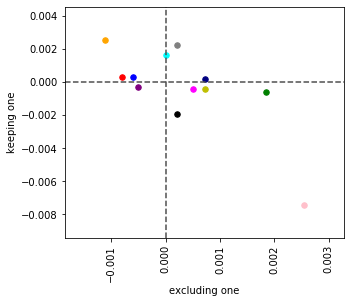

	head	ablating	keeping
	0	-0.00081 	0.00031
	1	0.00184 	-0.00061
	2	-0.00061 	0.00031
	3	0.00072 	-0.00040
	4	0.00000 	0.00163
	5	0.00051 	-0.00040
	6	0.00021 	-0.00193
	7	0.00021 	0.00224
	8	-0.00112 	0.00255
	9	-0.00051 	-0.00030
	10	0.00072 	0.00021
	11	0.00255 	-0.00743
	avg	0.00031 	-0.00032


< LAYER 2 >


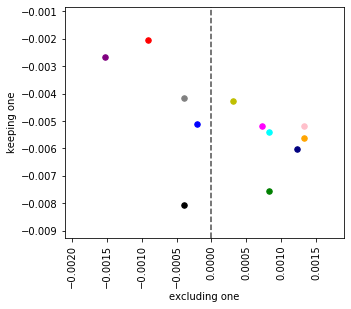

	head	ablating	keeping
	0	-0.00091 	-0.00203
	1	0.00082 	-0.00754
	2	-0.00020 	-0.00509
	3	0.00031 	-0.00428
	4	0.00082 	-0.00540
	5	0.00072 	-0.00519
	6	-0.00040 	-0.00805
	7	-0.00040 	-0.00417
	8	0.00133 	-0.00560
	9	-0.00153 	-0.00265
	10	0.00123 	-0.00601
	11	0.00133 	-0.00519
	avg	0.00026 	-0.00510


< LAYER 3 >


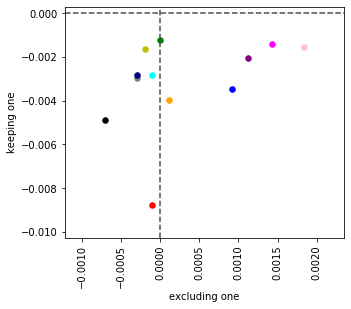

	head	ablating	keeping
	0	-0.00010 	-0.00876
	1	0.00000 	-0.00122
	2	0.00092 	-0.00346
	3	-0.00020 	-0.00163
	4	-0.00010 	-0.00285
	5	0.00143 	-0.00142
	6	-0.00071 	-0.00489
	7	-0.00030 	-0.00295
	8	0.00011 	-0.00397
	9	0.00112 	-0.00203
	10	-0.00030 	-0.00285
	11	0.00184 	-0.00153
	avg	0.00031 	-0.00313


< LAYER 4 >


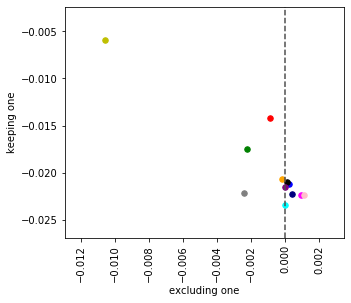

	head	ablating	keeping
	0	-0.00091 	-0.01416
	1	-0.00224 	-0.01752
	2	0.00021 	-0.02119
	3	-0.01059 	-0.00591
	4	0.00000 	-0.02343
	5	0.00092 	-0.02241
	6	0.00011 	-0.02099
	7	-0.00244 	-0.02221
	8	-0.00020 	-0.02068
	9	0.00000 	-0.02149
	10	0.00041 	-0.02231
	11	0.00112 	-0.02241
	avg	-0.00113 	-0.01956


< LAYER 5 >


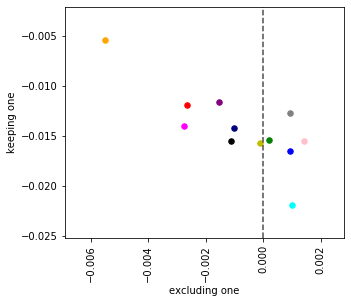

	head	ablating	keeping
	0	-0.00265 	-0.01192
	1	0.00021 	-0.01538
	2	0.00092 	-0.01650
	3	-0.00010 	-0.01569
	4	0.00102 	-0.02190
	5	-0.00275 	-0.01395
	6	-0.00112 	-0.01548
	7	0.00092 	-0.01273
	8	-0.00550 	-0.00540
	9	-0.00153 	-0.01161
	10	-0.00102 	-0.01416
	11	0.00143 	-0.01548
	avg	-0.00085 	-0.01418


< LAYER 6 >


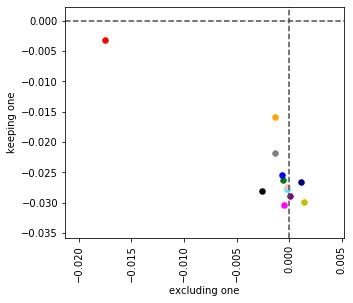

	head	ablating	keeping
	0	-0.01752 	-0.00316
	1	-0.00061 	-0.02628
	2	-0.00071 	-0.02547
	3	0.00143 	-0.02995
	4	-0.00020 	-0.02781
	5	-0.00051 	-0.03036
	6	-0.00254 	-0.02802
	7	-0.00132 	-0.02180
	8	-0.00132 	-0.01579
	9	0.00011 	-0.02883
	10	0.00112 	-0.02659
	11	-0.00020 	-0.02740
	avg	-0.00186 	-0.02429


< LAYER 7 >


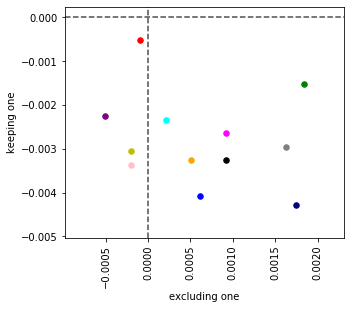

	head	ablating	keeping
	0	-0.00010 	-0.00051
	1	0.00184 	-0.00153
	2	0.00061 	-0.00407
	3	-0.00020 	-0.00305
	4	0.00021 	-0.00234
	5	0.00092 	-0.00265
	6	0.00092 	-0.00326
	7	0.00163 	-0.00295
	8	0.00051 	-0.00326
	9	-0.00051 	-0.00224
	10	0.00174 	-0.00428
	11	-0.00020 	-0.00336
	avg	0.00061 	-0.00279


< LAYER 8 >


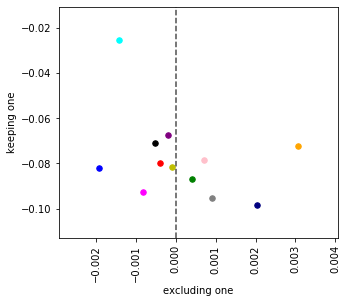

	head	ablating	keeping
	0	-0.00040 	-0.07967
	1	0.00041 	-0.08690
	2	-0.00193 	-0.08191
	3	-0.00010 	-0.08140
	4	-0.00142 	-0.02526
	5	-0.00081 	-0.09271
	6	-0.00051 	-0.07111
	7	0.00092 	-0.09526
	8	0.00306 	-0.07203
	9	-0.00020 	-0.06744
	10	0.00204 	-0.09842
	11	0.00072 	-0.07824
	avg	0.00015 	-0.07753


< LAYER 9 >


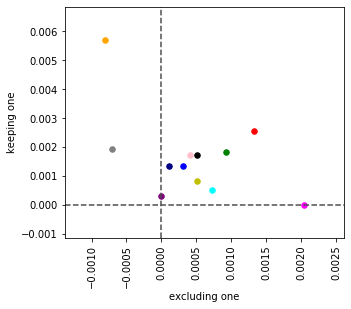

	head	ablating	keeping
	0	0.00133 	0.00255
	1	0.00092 	0.00184
	2	0.00031 	0.00133
	3	0.00051 	0.00082
	4	0.00072 	0.00051
	5	0.00204 	0.00000
	6	0.00051 	0.00174
	7	-0.00071 	0.00194
	8	-0.00081 	0.00571
	9	0.00000 	0.00031
	10	0.00011 	0.00133
	11	0.00041 	0.00174
	avg	0.00045 	0.00165


< LAYER 10 >


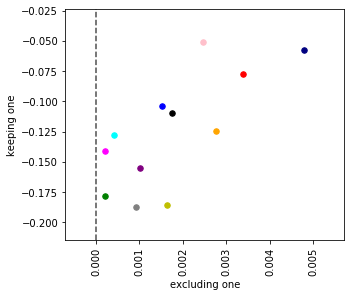

	head	ablating	keeping
	0	0.00337 	-0.07702
	1	0.00021 	-0.17840
	2	0.00153 	-0.10382
	3	0.00163 	-0.18583
	4	0.00041 	-0.12776
	5	0.00021 	-0.14060
	6	0.00174 	-0.10942
	7	0.00092 	-0.18757
	8	0.00275 	-0.12440
	9	0.00102 	-0.15537
	10	0.00479 	-0.05705
	11	0.00245 	-0.05114
	avg	0.00175 	-0.12487


< LAYER 11 >


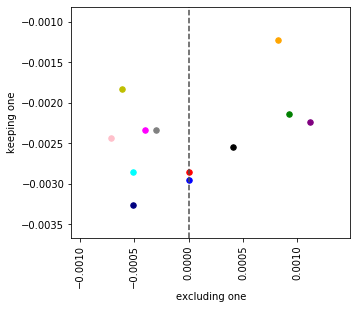

	head	ablating	keeping
	0	0.00000 	-0.00285
	1	0.00092 	-0.00214
	2	0.00000 	-0.00295
	3	-0.00061 	-0.00183
	4	-0.00051 	-0.00285
	5	-0.00040 	-0.00234
	6	0.00041 	-0.00254
	7	-0.00030 	-0.00234
	8	0.00082 	-0.00122
	9	0.00112 	-0.00224
	10	-0.00051 	-0.00326
	11	-0.00071 	-0.00244
	avg	0.00002 	-0.00242


In [11]:
all_exclude_relations = []
all_keep_relations = []

for layer_ind in range(num_layer):
    print(f"\n\n< LAYER {layer_ind} >")
#     display_plot(f"../head_distributions/{dataset}/attn-l{layer_ind}-heads.png")
    
    excluding_diffs = []
    keep_diffs = []

    for head_ind in range(num_heads):
        log_ind_base = (num_heads*layer_ind) + head_ind
        ablated_acc = float(accuracy[log_ind_base+1])
        ablate_one_diff = round(ablated_acc - base_acc, 5)
        
        reverse_acc = float(reverse_accuracy[log_ind_base+1])
        reverse_diff = round(reverse_acc - base_acc, 5)
        
        excluding_diffs.append(ablate_one_diff)
        keep_diffs.append(reverse_diff)
        
    plot_head_relation(excluding_diffs, keep_diffs)
    
    all_exclude_relations.append(excluding_diffs)
    all_keep_relations.append(keep_diffs)
    
    print("\thead\tablating\tkeeping")
    for ind, (ablate_one_diff, reverse_diff) in enumerate(zip(excluding_diffs, keep_diffs)):
        print('\t{0}\t{1:.5f} \t{2:.5f}'.format(ind, ablate_one_diff, reverse_diff))
        
    print('\t{0}\t{1:.5f} \t{2:.5f}'.format("avg", np.mean(excluding_diffs), np.mean(keep_diffs)))
    

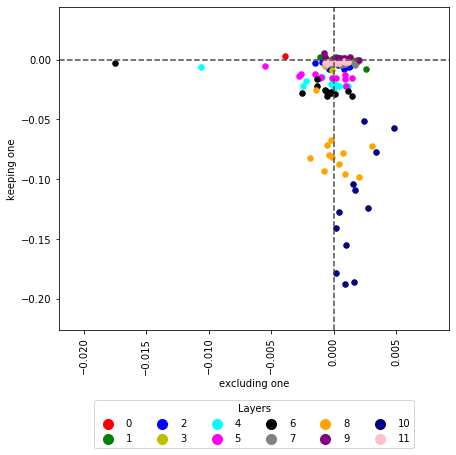

In [12]:
plot_all_relation(all_exclude_relations, all_keep_relations)

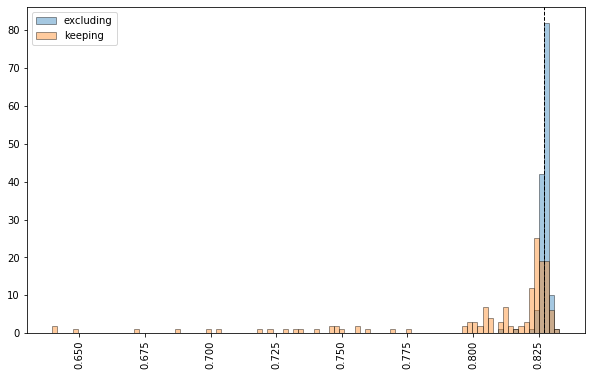

In [15]:
fig = plt.gcf()
fig.set_size_inches(10, 6)

num_bins = 100

reported_acc = np.array(accuracy[1:], dtype=float)
reported_acc = np.around(reported_acc, 5)

reported_reverse_acc = np.array(reverse_accuracy[1:], dtype=float)
reported_reverse_acc = np.around(reported_reverse_acc, 5)

bins = np.linspace(min(reported_acc.min(), reported_reverse_acc.min()), max(reported_acc.max(), reported_reverse_acc.max()), num_bins)

plt.hist(reported_acc, bins, edgecolor='k', alpha=0.4, label='excluding')
plt.hist(reported_reverse_acc, bins, edgecolor='k', alpha=0.4, label='keeping')
plt.axvline(base_acc, color='k', linestyle='dashed', linewidth=1)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()


# Variance Study

    Difference in the amount of variance explained by the two components from PCA
    
    1. calculate variance explained for each heads (12 layers * 12 heads * 2 components)
    2. for each pair, compute the difference
    3. compute average for each layer
    
    numbers in bracket is difference in the (aggregated - 2 componenets) percentage of variance explained 
    

- layer 0 : -0.009700178169 ( -0.004618635401 )
- layer 1 : -0.002130121148 ( -0.01102727962 )
- layer 2 : -0.0005090703877 ( -0.008767988533 )
- layer 3 : -0.008532019642 ( -0.0001414188494 )
- layer 4 : -0.01443783442 ( 0.01288391898 )
- layer 5 : -0.006370164144 ( 0.009677752232 )
- layer 6 : -0.02571878924 ( -0.007680003531 )
- layer 7 : -0.001414982602 ( -0.01829779334 )
- layer 8 : 0.1295127854 ( 0.05322728865 )
- layer 9 : 0.3625547122 ( 0.1430218257 )
- layer 10 : 0.7758189954 ( 0.3924566129 )
- layer 11 : 1.779233397 ( 0.5672445898 )